* **Import Libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dropout,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import cifar10


* **Load Dataset And information about dataset**

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Label	Description**<br>
0	airplane<br>
1	automobile<br>
2	bird<br>
3	cat<br>
4	deer<br>
5	dog<br>
6	frog<br>
7	horse<br>
8	ship<br>
9	truck<br>

**Define classification name**

In [4]:
y_class = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

* **Visualize**

/tmp/ipython-input-5-4156047974.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  titel_index = int(y_train[i])


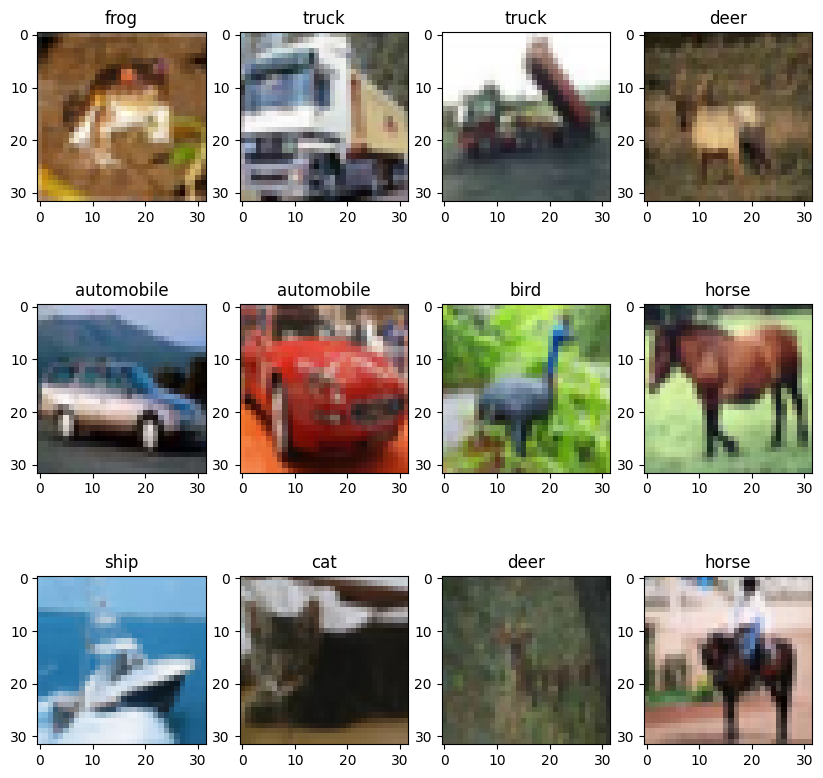

In [5]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
  ax = fig.add_subplot(3,4,i+1)
  ax.imshow(x_train[i])
  titel_index = int(y_train[i])
  ax.set_title(y_class[titel_index])

* **Normalize**

In [6]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

num_clas = len(np.unique(y_train))

#One-hot code
y_train = tf.keras.utils.to_categorical(y_train,num_classes=num_clas)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=num_clas)

print("Dim of x_train",x_train.shape)
print("Dim of y_train",y_train.shape)

Dim of x_train (50000, 32, 32, 3)
Dim of y_train (50000, 10)


* **Model Define**

In [9]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
    Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=(128),kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(num_clas,activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

* **Compile the model**

In [15]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

* **Train the model**

In [17]:
check_point = ModelCheckpoint(filepath="model.weights.best.keras",save_best_only=True)
model.fit(x_train,y_train,batch_size=100,epochs=3,validation_data=(x_test,y_test),callbacks=[check_point])


Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 335s 670ms/step - accuracy: 0.3640 - loss: 1.7785 - val_accuracy: 0.5463 - val_loss: 1.2441
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 378s 662ms/step - accuracy: 0.6063 - loss: 1.1219 - val_accuracy: 0.6604 - val_loss: 0.9620
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 328s 657ms/step - accuracy: 0.6967 - loss: 0.8684 - val_accuracy: 0.7075 - val_loss: 0.8461


In [18]:
model.load_weights("model.weights.best.keras")

In [33]:
pred = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [34]:
pred

array([[1.16696313e-03, 2.85739341e-04, 4.01143823e-03, 4.35101300e-01,
        9.48968343e-04, 5.29006422e-01, 1.78357232e-02, 9.46313085e-04,
        1.00928126e-02, 6.04315137e-04],
       [4.25688317e-03, 1.52430981e-01, 2.34586878e-05, 1.65451511e-05,
        4.56158432e-07, 2.29270586e-06, 1.14068871e-05, 8.25654709e-08,
        8.37619185e-01, 5.63877122e-03],
       [2.42765859e-01, 2.55612969e-01, 1.01028439e-02, 2.16055904e-02,
        7.84869946e-04, 5.79175726e-03, 1.93124672e-03, 2.21978291e-03,
        4.22018647e-01, 3.71663719e-02],
       [7.50920296e-01, 1.61845442e-02, 6.88823313e-03, 3.25498893e-03,
        1.47969425e-02, 3.60950798e-04, 2.79524177e-03, 2.87695613e-04,
        1.99210495e-01, 5.30066714e-03],
       [7.42634938e-06, 7.02653851e-05, 3.79865221e-03, 8.51160437e-02,
        4.56358911e-03, 1.56764742e-02, 8.90281618e-01, 2.90404187e-05,
        3.88122251e-04, 6.88432701e-05],
       [7.34188798e-05, 2.02670606e-04, 8.46957497e-04, 7.69780390e-03,
   

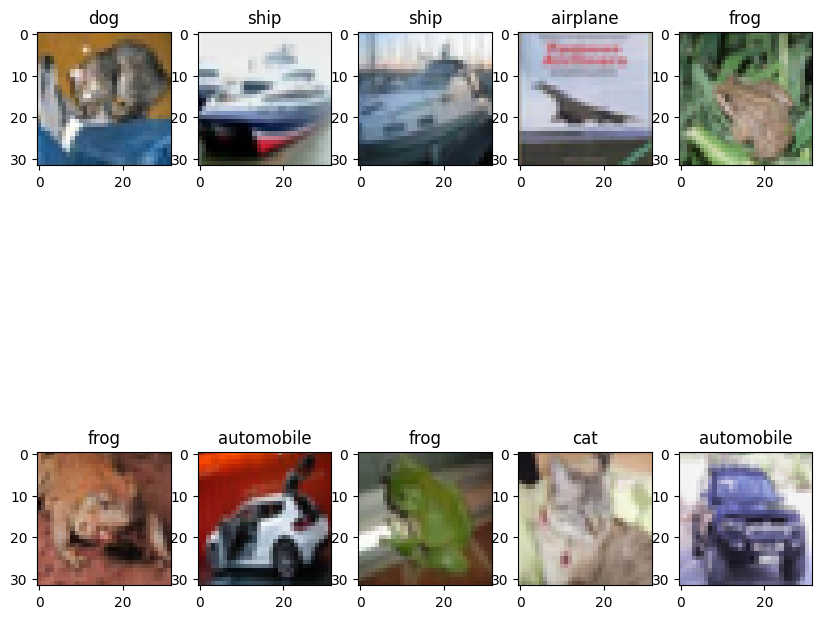

In [35]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
  ax = fig.add_subplot(2,5,i+1)
  index = np.argmax(pred[i])
  ax.set_title(y_class[index])
  ax.imshow(x_test[i])